In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import plotly.express as px
import warnings
from ydata_profiling import ProfileReport
import wandb

ModuleNotFoundError: No module named 'plotly'

In [3]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
# Login to Weights & Biases
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hangtn13-ssc-national-economics-university (use `wandb login --relogin` to force relogin)


True

In [5]:
# save_code tracking all changes of the notebook and sync with Wandb
run = wandb.init(project="Bank-Marketing", save_code=True)

In [6]:
run = wandb.init()
artifact = run.use_artifact('hangtn13-ssc-national-economics-university/Bank-Marketing/raw_data:latest', type='dataset')
artifact_dir = artifact.download()

# **OVERVIEW**

In [7]:
df= pd.read_csv(os.path.join(artifact_dir, 'raw_data.csv'))

In [8]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp_var_rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [10]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m   nr_employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [11]:
ProfileReport(df, title="Pandas Profiling Report", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(41176, 21)

# **EDA**

## Univariate

In [17]:
%matplotlib inline

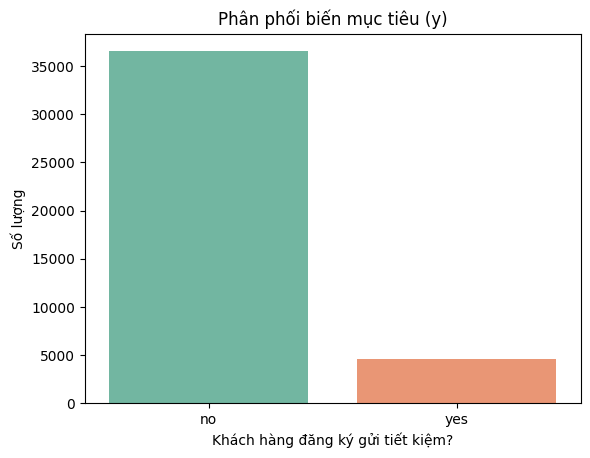

In [ ]:
# 1. Target Variable Distribution
sns.countplot(x='y', data=df, palette='Set2')
plt.title('Target Distribution (y)')
plt.xlabel('Customer subscribed to term deposit?')
plt.ylabel('Count')
plt.show()

Target Variable Distribution (y)
The target variable y is binary, representing whether a customer subscribed to a term deposit:

- yes: the customer subscribed,

- no: the customer did not subscribe.

The distribution is highly imbalanced:

- Approximately 88% to 90% of the samples are labeled as 'no',

- Only 10% to 12% are labeled as 'yes'.

This imbalance suggests that special care (e.g., resampling, class weights, or using suitable evaluation metrics) is required during model training to avoid biased predictions.

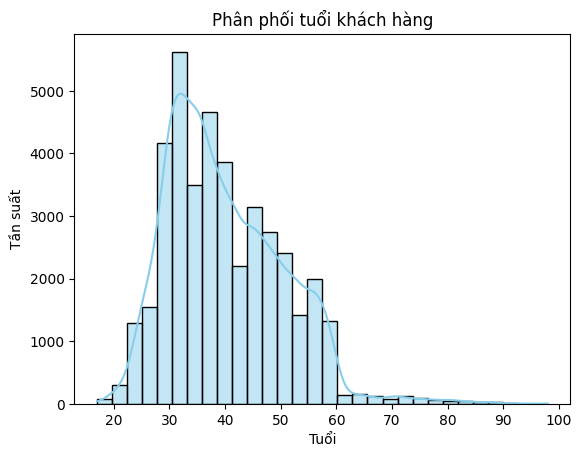

In [ ]:
# 2. Age Distribution
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Age Distribution**
- Most customers are between 20 and 60 years old.

- The distribution is slightly right-skewed, indicating more younger individuals.

- The peak frequency is observed in the 30–40 age range.

- A few outliers exist above 80 years old.

**Insight**:
The majority of customers fall within the working and wealth-accumulating age group, which aligns well with the target audience for term deposit products.

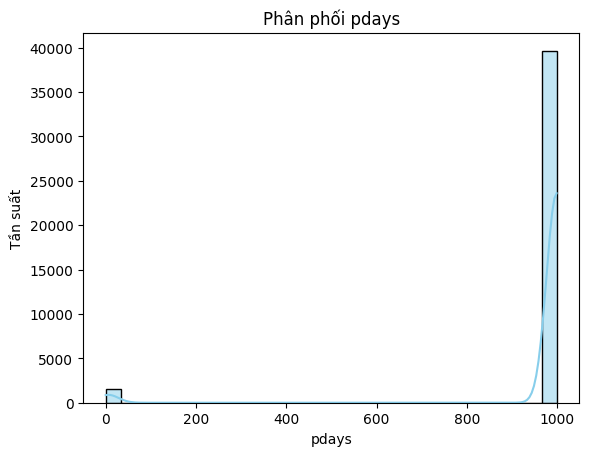

In [ ]:
# 2. Distribution of pdays
sns.histplot(df['pdays'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of pdays')
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.show()

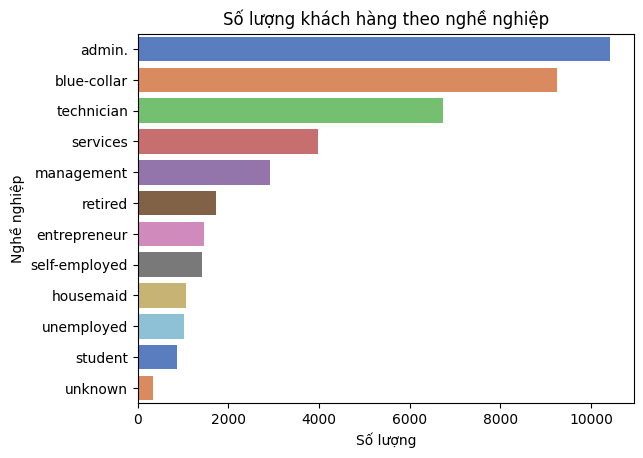

In [ ]:
# 3. Job Distribution
sns.countplot(y='job', data=df, order=df['job'].value_counts().index, palette='muted')
plt.title('Number of Customers by Job')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

### Job Distribution – Observations

**The most common job groups are:**
- *Admin.* (administrative)
- *Blue-collar* (manual labor)
- *Technician*
- *Services*

**Less frequent occupations include:**
- *Student*
- *Unemployed*
- *Housemaid*
- *Unknown*

**Insight:**  
The job distribution reflects a wide representation of different social and economic classes, indicating that the marketing campaign targeted a broad customer base.

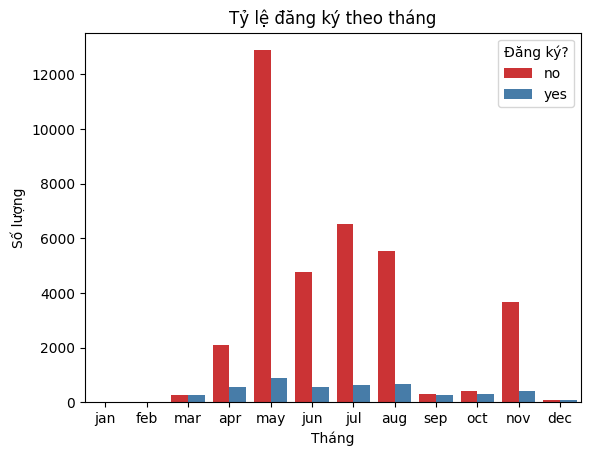

In [ ]:
# 4. Subscription Rate by Month
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.countplot(data=df, x='month', hue='y', order=month_order, palette='Set1')
plt.title('Subscription Rate by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Subscribed?')
plt.show()

### Subscription Rate by Month – Observations

- Certain months such as **May**, **August**, and **October** show a very high number of contacts.
- However, the **'yes'** (subscription) rate tends to be higher in months with fewer calls, such as **March** and **December**.

### Insight

- The marketing campaign appears to have been unevenly distributed across months.
- Campaign effectiveness may not solely depend on the number of calls but also on **timing** within the year — for example, customers might be more inclined to subscribe to term deposits near the **end of the year**.
- **May**, despite having the **highest number of contacts**, does not correspond with a proportionally high subscription rate, suggesting **lower campaign efficiency** during that month.


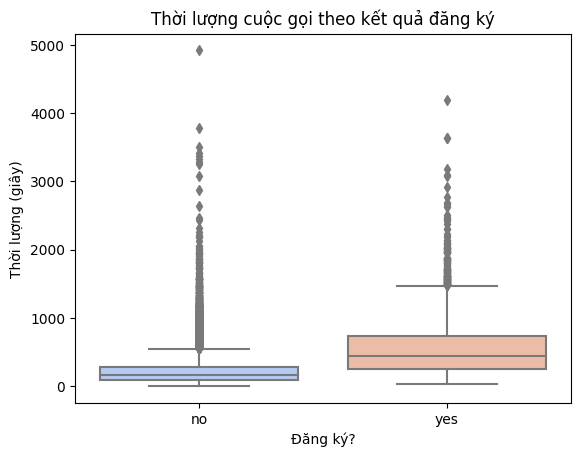

In [ ]:
# 5. Call Duration by Subscription Result
sns.boxplot(x='y', y='duration', data=df, palette='coolwarm')
plt.title('Call Duration by Subscription Result')
plt.xlabel('Subscribed?')
plt.ylabel('Duration (seconds)')
plt.show()

### Call Duration by Subscription Result – Observations

- When customers **do not subscribe** (y='no'), the **call duration** is typically **shorter**.
- When customers **subscribe** (y='yes'), the **call duration** tends to be **longer** and the distribution is **wider**.

### Insight:
- The difference in call duration suggests that **longer interactions** may be associated with a higher likelihood of subscription, which could indicate more **engaged customers** who are willing to discuss and learn more about the product.

## Multivariate

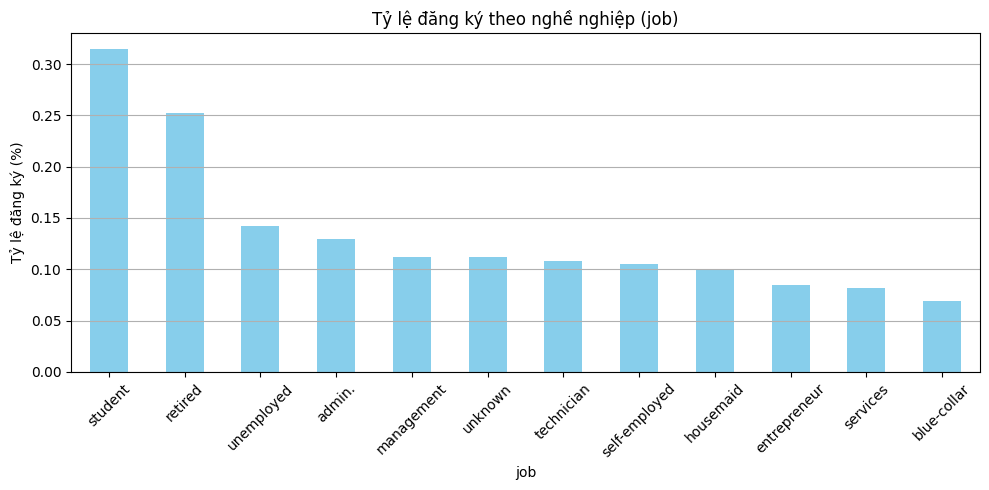

In [ ]:
# Subscription Rate by Job
job_conversion = df.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(10,5))
job_conversion.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Subscription Rate by Job')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

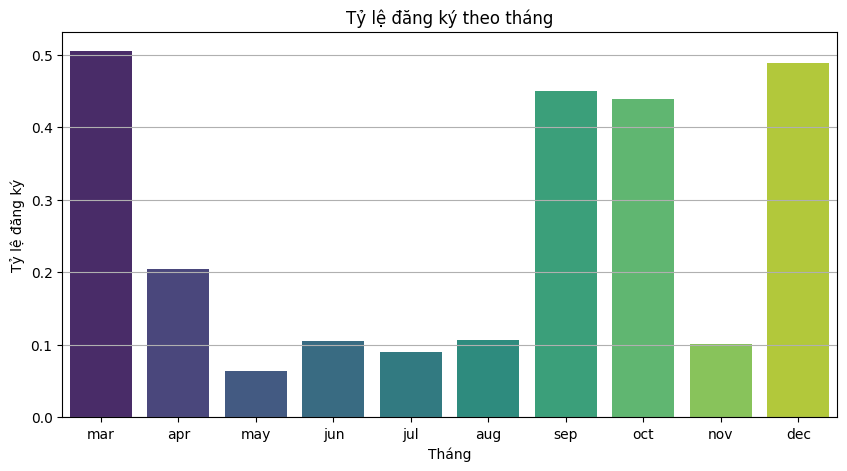

In [ ]:
# Sorting by Month Order
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

month_conversion = df.groupby('month')['y'].value_counts(normalize=True).unstack().fillna(0)
month_conversion = month_conversion.loc[month_order]

plt.figure(figsize=(10,5))
sns.barplot(x=month_conversion.index, y=month_conversion['yes'], palette='viridis')
plt.title('Subscription Rate by Month')
plt.ylabel('Subscription Rate')
plt.xlabel('Month')
plt.grid(axis='y')
plt.show()

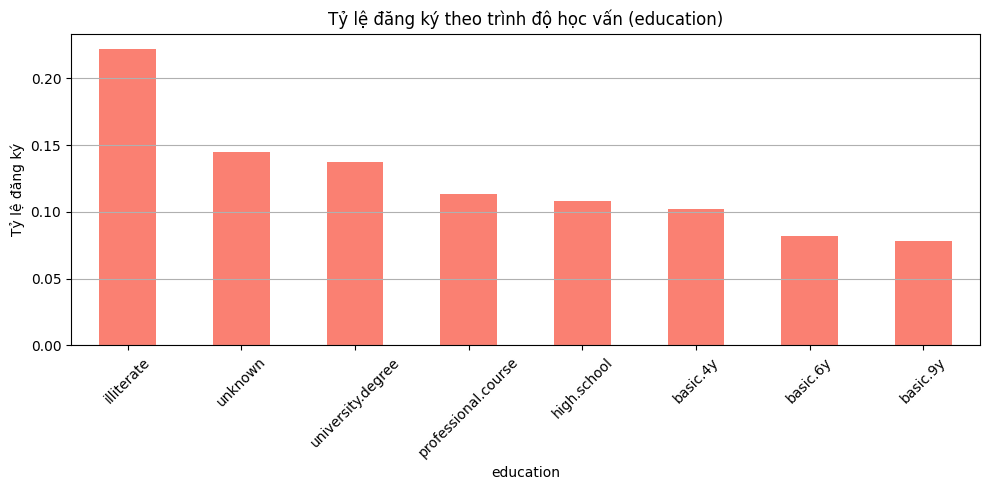

In [ ]:
# Subscription Rate by Education
edu_conversion = df.groupby('education')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(10,5))
edu_conversion.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Subscription Rate by Education Level')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Subscription Rate by Education Level – Insights

- **University degree** and **professional course** groups show a **higher subscription rate**.
- **Basic 4y**, **Basic 6y**, and **Basic 9y** categories have a **lower subscription rate**, which suggests that **higher education** correlates with a better understanding of the benefits of the product.

**Insight:**  
Education level is a **significant factor** in predicting subscription behavior, with higher education levels leading to a better understanding of the product and thus a higher likelihood of subscribing.

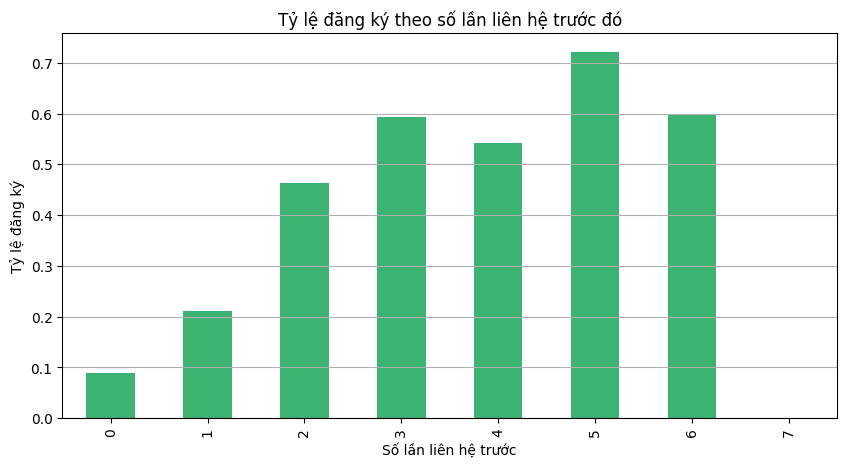

In [ ]:
# Subscription Rate by Previous Contact Count (only valid values)
prev_conv = df[df['previous'] < 20].groupby('previous')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(10,5))
prev_conv.plot(kind='bar', color='mediumseagreen')
plt.title('Subscription Rate by Previous Contact Count')
plt.ylabel('Subscription Rate')
plt.xlabel('Number of Previous Contacts')
plt.grid(axis='y')
plt.show()

### Subscription Rate by Previous Contact Count – Insights

- The subscription rate increases with the number of previous contacts (up to about **3–4 contacts**), after which it starts to **decline**.
- This suggests that **initial repeated contact** can enhance conversion chances, but excessive contact may have a **negative effect**, potentially causing customer irritation and reducing conversion rates.

**Insight:**  
Strategically limiting the number of contacts could be crucial for optimizing conversion rates. Too many follow-ups might backfire and lead to customer dissatisfaction.

## HEATMAP

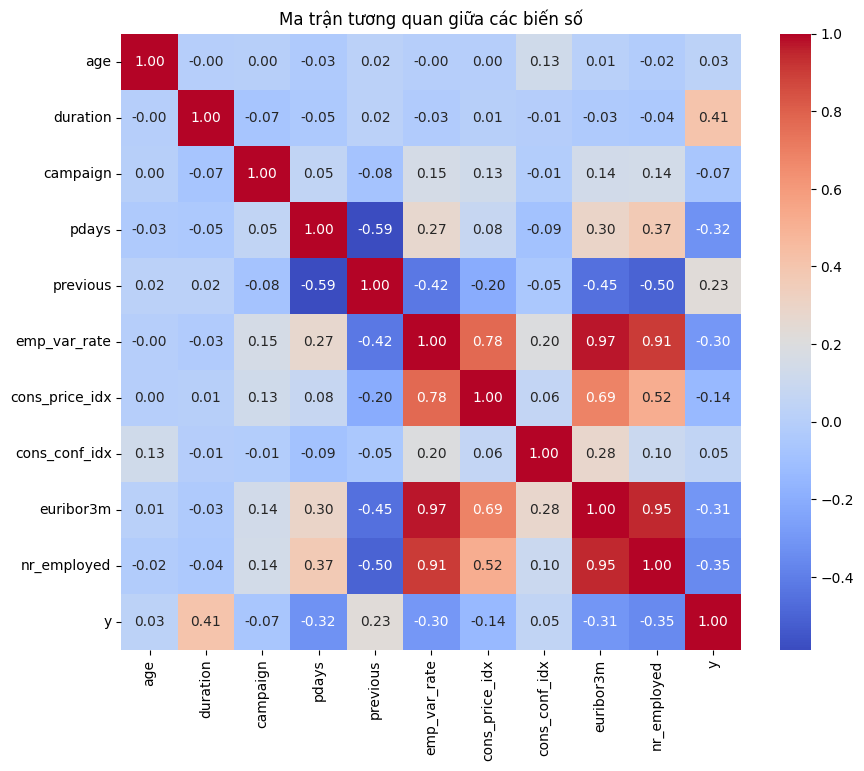

In [ ]:
# Correlation matrix
df_corr = df.copy()
df_corr['y'] = df_corr['y'].map({'yes': 1, 'no': 0})

plt.figure(figsize=(10,8))
sns.heatmap(df_corr.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

# **OUTLIERS**

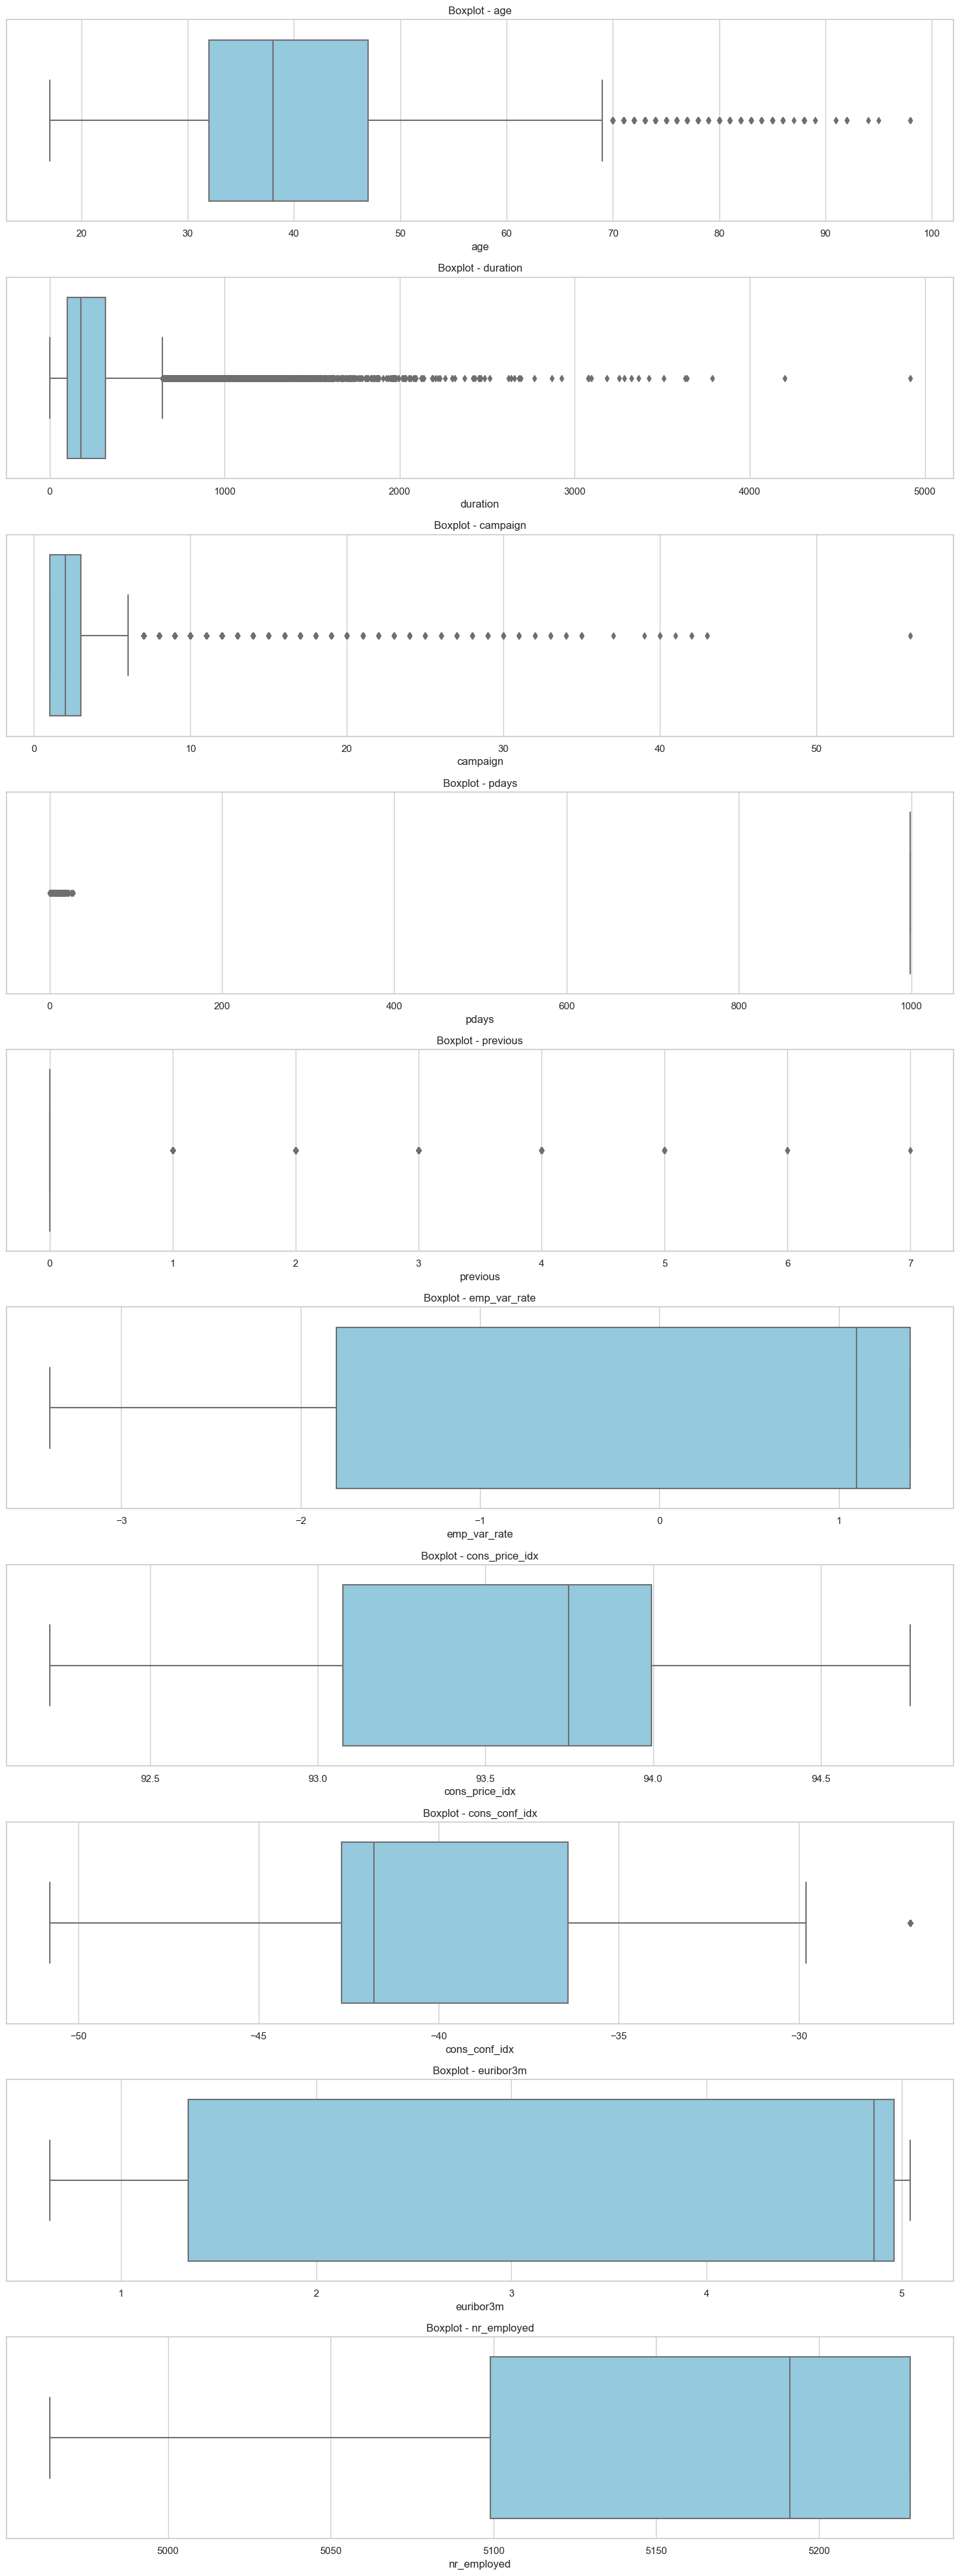

In [ ]:
# numeric columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set style
sns.set(style="whitegrid")

# Boxplot for each numerical column
plt.figure(figsize=(15, 4 * len(numerical_cols)))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()

plt.show()

In [30]:
run.finish()